# Assignment 2  

In this assignment, we need to identify the data scale, data type, etc. of five different data sets. Subsequently, we have to visualize the data using relevant plots (histograms, bar charts, etc.). 

## Creating a List of 5 Data Sets 

### Problem statement 

Create a list of 5 open data sets available for machine learning along with their URLs for each of the three data types as given below:
  * Discrete data type, 
  * Sequential (temporal) data type and 
  * Spatial data type




### Solution 

I have used the datasets provided by the **University of California Irvine (UCI)**. These datasets are available on https://archive.ics.uci.edu/ml/datasets.php. 

Though all the datasets furnished by the UCI are well-polished, I found a few datasets having some missing values, like `?` in some entries. That's why I have pre-processed those datasets by removing the missing values. Later, I have saved these datasets as CSV files to be passed as an argument to the various functions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import mode

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Discrete type 
# Description of the following dataset is on https://archive.ics.uci.edu/ml/datasets/Auto+MPG 
url_1_discrete_type = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Apply the column names on the dataset 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Read the dataset with proper delimiter and column names as given above 
auto_mpg = pd.read_csv(url_1_discrete_type, delim_whitespace = True, names = column_names)

In [3]:
# View 10 random rows to glance at the auto_mpg
auto_mpg.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
270,21.1,4,134.0,95.00,2515.0,14.8,78,3,toyota celica gt liftback
98,16.0,6,250.0,100.0,3278.0,18.0,73,1,chevrolet nova custom
19,26.0,4,97.0,46.00,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan
170,23.0,4,140.0,78.00,2592.0,18.5,75,1,pontiac astro
203,29.5,4,97.0,71.00,1825.0,12.2,76,2,volkswagen rabbit
84,27.0,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)
143,26.0,4,97.0,78.00,2300.0,14.5,74,2,opel manta
162,15.0,6,258.0,110.0,3730.0,19.0,75,1,amc matador
146,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
142,26.0,4,79.0,67.00,1963.0,15.5,74,2,volkswagen dasher


In [4]:
# The column horsepower in auto_mpg has ? as some entries  
# Find the rows having horsepower as ?
auto_mpg[auto_mpg['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [5]:
# Drop the rows having horsepower as ? 
auto_mpg.drop(auto_mpg[auto_mpg['horsepower'] == '?'].index, inplace = True)

In [6]:
# Check whether the rows with horsepower as ? are gone 
auto_mpg[auto_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [7]:
# Check the data types of the attributes in auto_mpg 
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


From the above mentioned details, we find out that the attribute `horsepower` is stored as `object` type. So, we need to change its type to `numeric`. 



In [8]:
# Change the data type of horsepower to numeric 
auto_mpg.horsepower = auto_mpg.horsepower.apply(pd.to_numeric)

# Check the data types of the attributes in auto_mpg after the above change 
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


After removing the missing values and changing the data type of `horsepower`, we will save the `auto_mpg` as a CSV file. 

In [9]:
# Store the auto_mpg data in a CSV file for further functions
auto_mpg.to_csv('auto-mpg.csv', index=False)

Now, we will read and save another dataset. 

In [10]:
# Discrete type 
# Description of the following dataset is on https://archive.ics.uci.edu/ml/datasets/Iris 
url_2_discrete_type = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Apply the column names on the dataset 
column_names = ["sepal_length","sepal_width","petal_length","petal_width", "species"]

# Read the dataset with column names as given above 
iris = pd.read_csv(url_2_discrete_type, names = column_names)

In [11]:
# View 10 random rows to glance at the auto_mpg
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,Iris-versicolor
132,6.4,2.8,5.6,2.2,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
39,5.1,3.4,1.5,0.2,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
23,5.1,3.3,1.7,0.5,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa


In [12]:
# Store the iris data in a CSV file for further functions
iris.to_csv('iris.csv', index = False)

Now, we will read and save another dataset. 

In [13]:
# Discrete type 
# Description of the following dataset is on https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
url_3_discrete_type = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Apply the column names on the dataset 
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_accept"]

# Read the dataset with column names as given above 
car = pd.read_csv(url_3_discrete_type, names = column_names)

In [14]:
# View 10 random rows to glance at the car
car.sample(10)

,buying,maint,doors,persons,lug_boot,safety,car_accept
1694,low,low,4,more,small,high,good
905,med,vhigh,3,4,med,high,acc
406,vhigh,low,5more,2,small,med,unacc
313,vhigh,med,5more,4,big,med,acc
748,high,med,5more,more,small,med,unacc
1204,med,low,2,4,big,med,good
544,high,high,2,2,med,med,unacc
1009,med,high,3,4,small,med,unacc
901,med,vhigh,3,4,small,med,unacc
753,high,med,5more,more,big,low,unacc


In [15]:
# Store the car data in a CSV file for further functions
car.to_csv('car.csv', index = False)

Now, we will look at one spatial data. 

In [16]:
# Spatial type 
# Description of the following dataset is on https://archive.ics.uci.edu/ml/datasets/Connect-4

# This data is available inside a zipped folder at the above mentioned URL. 
# For the sake of simplicity, I have downloaded the data and pushed it on GitHub. 

url_4_spatial_type = "https://raw.githubusercontent.com/SudhakarKuma/Machine_Learning/master/ME781/Assignment_2/connect-4.data"

# The column names of this dataset are a1, a2, ..., a6 and similarly, upto g1, g2, ..., g6. 
# To create a list with column names, I have used a for loop as given below. 
# Apply the column names on the dataset 

alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
i = 1
column_names = []

for val in alpha: 
  for i in range(1, 7): 
    column_names.append(val + str(i))

column_names.append("outcome")

# Read the dataset with column names as given above 
connect_4 = pd.read_csv(url_4_spatial_type, names = column_names)

In [17]:
# View 10 random rows to glance at the car
connect_4.sample(10)

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,outcome
62002,x,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,loss
34777,x,x,b,b,b,b,o,b,b,b,b,b,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,o,o,b,b,b,b,b,b,b,b,b,loss
62617,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,o,o,x,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,win
49707,x,o,x,b,b,b,x,x,b,b,b,b,o,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
24019,b,b,b,b,b,b,o,x,b,b,b,b,x,x,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,b,b,b,b,win
28314,b,b,b,b,b,b,b,b,b,b,b,b,x,x,o,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,x,o,o,x,b,b,b,b,b,b,b,b,win
6680,b,b,b,b,b,b,x,b,b,b,b,b,o,o,b,b,b,b,x,x,b,b,b,b,b,b,b,b,b,b,o,o,b,b,b,b,x,b,b,b,b,b,win
30591,b,b,b,b,b,b,b,b,b,b,b,b,x,o,x,o,x,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,draw
63921,x,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,b,b,b,win
54868,x,o,x,b,b,b,x,o,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,b,b,b,b,b,b,loss


In [18]:
# Store the connect_4 data in a CSV file for further functions
connect_4.to_csv('connect_4.csv', index = False)

Now, we will have a look at sequential data. 

In [19]:
# Sequential type 
# Description of the following dataset is on https://archive.ics.uci.edu/ml/datasets/Online+Retail
url_5_sequential_type = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Read the dataset 
online_retail = pd.read_excel(url_5_sequential_type)

In [20]:
# View 10 random rows to glance at the online_retail
online_retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395189,571028,22579,WOODEN TREE CHRISTMAS SCANDINAVIAN,4,2011-10-13 12:21:00,0.29,16770.0,United Kingdom
337309,566443,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2011-09-12 15:31:00,1.25,17071.0,United Kingdom
466426,576329,23423,PANTRY 3 HOOK ROLLING PIN HANGER,1,2011-11-14 15:22:00,7.46,NaN,United Kingdom
238490,557938,85025B,EAU DE NILE HEART SHAPE PHOTO FRAME,1,2011-06-23 15:35:00,3.29,NaN,United Kingdom
128638,547358,22432,WATERING CAN PINK BUNNY,2,2011-03-22 12:25:00,1.95,15998.0,United Kingdom
254398,559311,22485,SET OF 2 WOODEN MARKET CRATES,6,2011-07-07 13:35:00,12.75,14459.0,United Kingdom
251149,559052,21706,FOLDING UMBRELLA RED/WHITE POLKADOT,4,2011-07-05 16:53:00,3.29,NaN,United Kingdom
120925,546684,22637,PIGGY BANK RETROSPOT,48,2011-03-16 09:47:00,2.10,16152.0,United Kingdom
50731,540551,90116,FRUIT SALAD BAG CHARM,3,2011-01-10 09:43:00,2.51,NaN,United Kingdom
279088,561236,22610,PENS ASSORTED FUNNY FACE,36,2011-07-26 10:27:00,0.19,15159.0,United Kingdom


In [21]:
# Store the online_retail data in a CSV file for further functions
online_retail.to_csv("online_retail.csv", index=False)

## Identifying the Data Scale and Data Value

### Problem Statement 

Write Python code to input a dataset (CSV file) of Discrete data type, automatically identify and print the
  * Number of attributes and number of entries
  * Data scale (Ratio/ Interval/ Ordinal/ Nominal) of each attribute
  * Data value (Discrete/ Continuous) of each attribute



### Solution

Here, I will write Python code which will take a CSV file as an argument and print the following:

* Number of entries and that of attributes 
* Print the data type, data scale, and data value of each attribute

As of now, I have followed the following logic to identify the data scale and data value:

Type | Number of categories | Data scale | Data value 
--- | --- | --- | --- | 
Float | Greater than 8 | Ratio | Continuous
Integer | Less than 8 | Ordinal | Discrete 
Integer | Greater than 8 | Nominal | Discrete
Object | NA | Nominal | Discrete 

In [22]:
def data_description(filename):

  """ Prints the shape of the data along with its scale and value 

  Args:
  dataset: CSV. The dataset to be identified. 

  Returns:
  None 
  """

  # Read the CSV file 
  df = pd.read_csv(filename)

  # Print the shape of the dataset 
  print("This dataset contains {} entries, each with {} attributes".format(df.shape[0], df.shape[1]))
  
  # Create a list with well known ordinal categories 
  # This list can be populated with more categories 
  ordinal_levels = ["excellent", "good", "fair", "bad", "like", "dislike", 
                    "extremely dislike", "neutral", "extremely like", "low", "high"]
  
  # Traverse through each column of the dataset 
  # Apply the logic given above to print the data scale and data value 
  for col in df.columns:
    if (df.dtypes[col] == 'float64' and df[col].nunique() > 8):
      print("{}: ratio or interval, continuous".format(col)) 

    elif (df.dtypes[col] == 'object' and df[col].any() not in ordinal_levels): 
      print("{}: nominal, discrete".format(col))

    elif (df.dtypes[col] == 'int64'):
      if (df[col].nunique() < 8):
        print("{}: ordinal, discrete".format(col))
      else:
        print("{}: nominal, discrete".format(col))


## Perfoming Statistics on each Column 

### Problem Statment 

Write Python code to perform statistics on each data column based on its data scale. 

### Solution 

Here, I will write Python code which will take a CSV file as an argument and print the following:

* Mode for discrete data 
* Maximum, minimum, mean, etc. for continuous data 

Even for this function, I have applied the logic used in the previous problem statement of **Identifying the Data Scale and Data Value**. 

In [23]:
def stats(filename):

  """ Prints the statistics of the attributes of the data  

  Args:
  dataset: CSV. The dataset to be analysed. 

  Returns:
  None 
  """

  # Read the CSV file 
  df = pd.read_csv(filename)

  # Traverse through each column of the dataset 
  # Apply the logic used previously to print various statistical results  
  for col in df.columns:
    if(df.dtypes[col] == "int64"):
      if(df[col].nunique() < 8):
        print(col)
        print("Mode of {}: {}".format(col, mode(df[col]).mode[0]))
        print(df[col].value_counts())
        print("="*40)

      else:
        print(col)
        print("Mode of {}: {}".format(col, mode(df[col]).mode[0]))
        print(df[col].describe())
        print("="*40)

    elif(df.dtypes[col] == "float64" and df[col].nunique() > 8):
      print(col)
      print(df[col].describe())
      print("="*40)
    
    elif(df.dtypes[col] == "object"):
      print(col)
      print("Mode of {}: {}".format(col, mode(df[col]).mode[0]))
      print(df[col].describe())
      print("="*40)


## Recognizing the Utility of a Boxplot 

### Problem Statement 

Can we use a boxplot for visualizing ordinal data?

### Solution 

We know that a boxplot is used to display the distribution of data based on the following five numbers:
* Minimum, 
* First quartile (Q1), 
* Median, 
* Third quartile (Q3), and 
* Maximum

All the numbers mentioned above will have some significance when we have continuous data. Let us plot the two attributes named `horsepower` (continuous and ratio)  and `cylinders` (discrete and ordinal) of the `auto_mpg` data. 

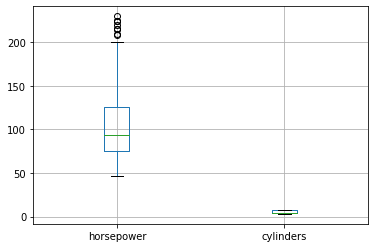

In [24]:
# Draw boxplot for both horsepower and cylinders 
boxplot = auto_mpg.boxplot(column=['horsepower', 'cylinders'], return_type='axes')

From the above plots, we observe that the boxplot of `horsepower` (continuous and ratio) provides meaningful information. However, the boxplot of `cylinders` (discrete and ordinal) is not giving any useful statistical values. 

Thus, we **can** draw a boxplot for visualizing ordinal data, but it won't convey some vital information. 

## Visualizing Data 

### Problem Statement 

Write Python code to visualize data in the CSV file (a generalized method depending upon data scale). 

### Solution 

Here, I will write Python code which will take a CSV file as an argument and plot the relevant plots (histogram, barplot, countplot, etc.) for each column. 

Even for this function, I have applied the logic used in the previous problem statement of **Identifying the Data Scale and Data Value**. 


In [25]:
def visualize_data(filename):

  """ Prints the statistics of the attributes of the data  

  Args:
  dataset: CSV. The dataset to be analysed. 

  Returns:
  None 
  """

  # Read the CSV file 
  df = pd.read_csv(filename)

  # Initialize a counter to draw seperate figures  
  plt_count = 1

  # Traverse through each column of the dataset 
  # Apply the logic used previously to draw various plots  
  for col in df.columns:
    if (df.dtypes[col] == 'float64' and df[col].nunique() > 8):
      plt.figure(plt_count)
      plt.hist(df[col])
      plt.title("Histogram of {}".format(col))
      plt.show()
      plt_count += 1
    
    elif (df.dtypes[col] == 'int64'):
      if (df[col].nunique() < 8):
        plt.figure(plt_count)
        plt.title("Countplot of {}".format(col))
        sns.countplot(df[col])
        plt.show()
        plt_count += 1
      else:
        plt.figure(plt_count)
        plt.hist(df[col])
        plt.title("Histogram of {}".format(col))
        plt.show()
        plt_count += 1

    elif (df.dtypes[col] == "object" and df[col].nunique() < 8):
      plt.figure(plt_count)
      plt.title("Countplot of {}".format(col))
      sns.countplot(df[col])
      plt.show()
      plt_count += 1

## Results 

From the solution of the first problem statement, we have the following datasets:

1. `auto-mpg.csv`
2. `iris.csv`
3. `car.csv`
4. `connect_4.csv`
5. `online_retail`

Now, I will pass these files one by one to the functions given below:

1. `data_description()` 
2. `stats()`
3. `visualize_data()`



### auto_mpg Data 

In [26]:
data_description("auto-mpg.csv")

This dataset contains 392 entries, each with 9 attributes
mpg: ratio or interval, continuous
cylinders: ordinal, discrete
displacement: ratio or interval, continuous
horsepower: ratio or interval, continuous
weight: ratio or interval, continuous
acceleration: ratio or interval, continuous
model_year: nominal, discrete
origin: ordinal, discrete
car_name: nominal, discrete


In [27]:
stats("auto-mpg.csv")

mpg
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
cylinders
Mode of cylinders: 4
4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64
displacement
count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64
horsepower
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
weight
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64
acceleration
count    392.000000
mean      15.541327
std        2.758864
min        8.00

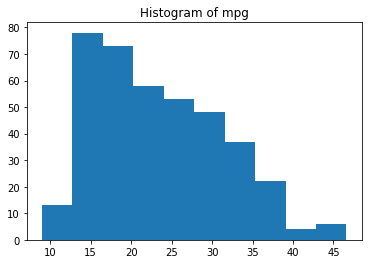

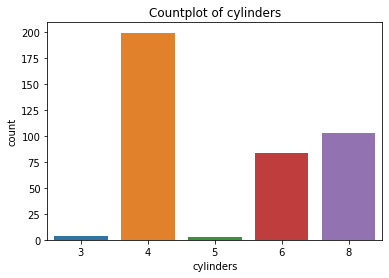

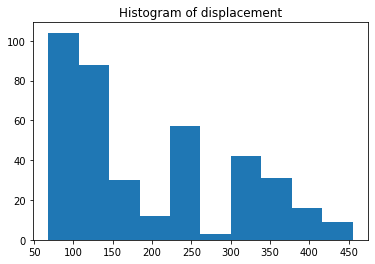

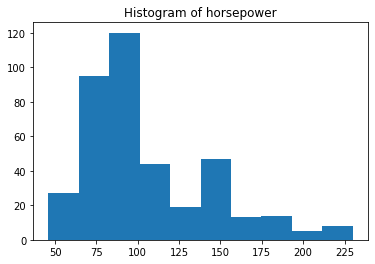

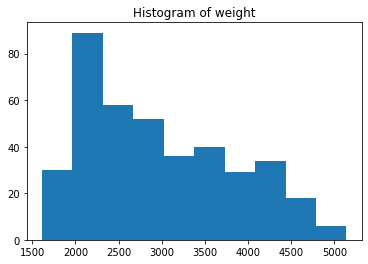

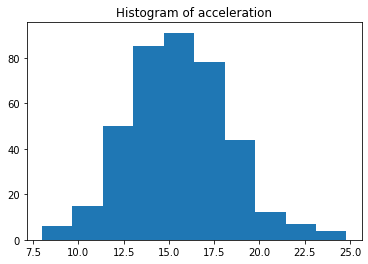

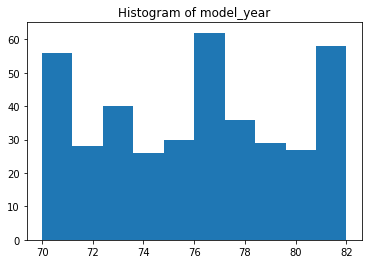

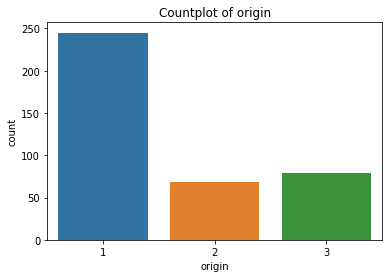

In [28]:
visualize_data("auto-mpg.csv")

### iris Data 

In [29]:
data_description("iris.csv")

This dataset contains 150 entries, each with 5 attributes
sepal_length: ratio or interval, continuous
sepal_width: ratio or interval, continuous
petal_length: ratio or interval, continuous
petal_width: ratio or interval, continuous
species: nominal, discrete


In [30]:
stats("iris.csv")

sepal_length
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64
sepal_width
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64
petal_length
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64
petal_width
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64
species
Mode of species: Iris-setosa
count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object


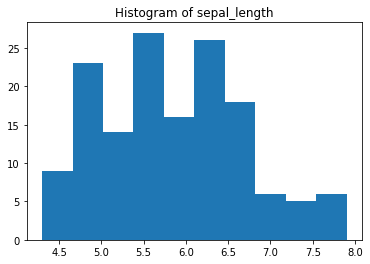

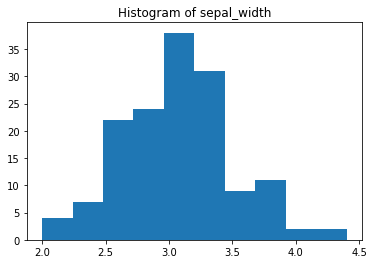

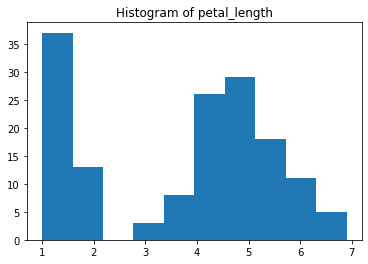

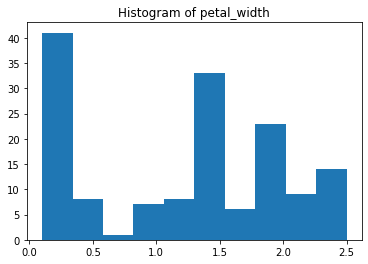

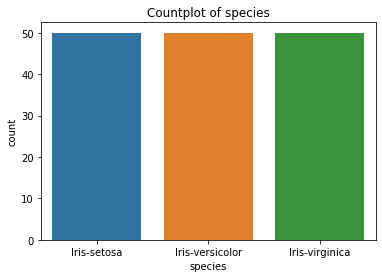

In [31]:
visualize_data("iris.csv")

### car Data 

In [32]:
data_description("car.csv")

This dataset contains 1728 entries, each with 7 attributes
buying: nominal, discrete
maint: nominal, discrete
doors: nominal, discrete
persons: nominal, discrete
lug_boot: nominal, discrete
car_accept: nominal, discrete


In [33]:
stats("car.csv")

buying
Mode of buying: high
count     1728
unique       4
top       high
freq       432
Name: buying, dtype: object
maint
Mode of maint: high
count     1728
unique       4
top       high
freq       432
Name: maint, dtype: object
doors
Mode of doors: 2
count     1728
unique       4
top          3
freq       432
Name: doors, dtype: object
persons
Mode of persons: 2
count     1728
unique       3
top          4
freq       576
Name: persons, dtype: object
lug_boot
Mode of lug_boot: big
count     1728
unique       3
top        med
freq       576
Name: lug_boot, dtype: object
safety
Mode of safety: high
count     1728
unique       3
top       high
freq       576
Name: safety, dtype: object
car_accept
Mode of car_accept: unacc
count      1728
unique        4
top       unacc
freq       1210
Name: car_accept, dtype: object


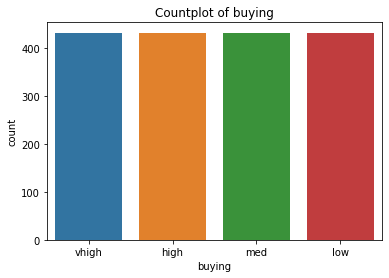

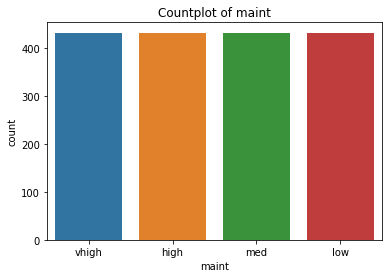

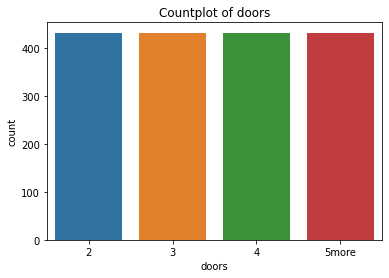

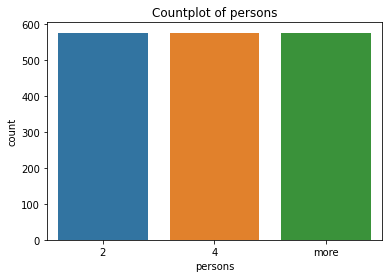

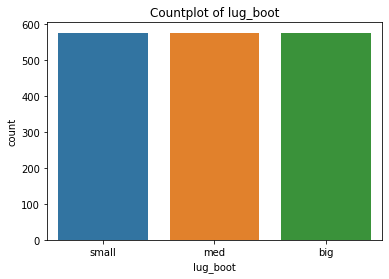

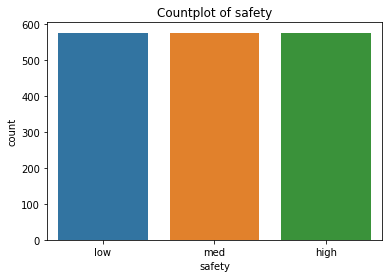

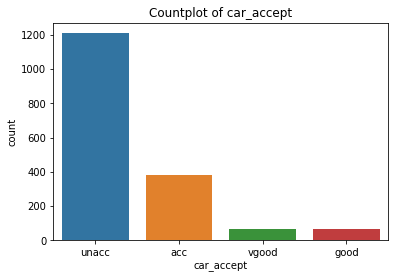

In [34]:
visualize_data("car.csv")

### connect_4 Data 

In [35]:
data_description("connect_4.csv")

This dataset contains 67557 entries, each with 43 attributes
a1: nominal, discrete
a2: nominal, discrete
a3: nominal, discrete
a4: nominal, discrete
a5: nominal, discrete
a6: nominal, discrete
b1: nominal, discrete
b2: nominal, discrete
b3: nominal, discrete
b4: nominal, discrete
b5: nominal, discrete
b6: nominal, discrete
c1: nominal, discrete
c2: nominal, discrete
c3: nominal, discrete
c4: nominal, discrete
c5: nominal, discrete
c6: nominal, discrete
d1: nominal, discrete
d2: nominal, discrete
d3: nominal, discrete
d4: nominal, discrete
d5: nominal, discrete
d6: nominal, discrete
e1: nominal, discrete
e2: nominal, discrete
e3: nominal, discrete
e4: nominal, discrete
e5: nominal, discrete
e6: nominal, discrete
f1: nominal, discrete
f2: nominal, discrete
f3: nominal, discrete
f4: nominal, discrete
f5: nominal, discrete
f6: nominal, discrete
g1: nominal, discrete
g2: nominal, discrete
g3: nominal, discrete
g4: nominal, discrete
g5: nominal, discrete
g6: nominal, discrete
outcome: nomina

In [36]:
stats("connect_4.csv")

a1
Mode of a1: b
count     67557
unique        3
top           b
freq      24982
Name: a1, dtype: object
a2
Mode of a2: b
count     67557
unique        3
top           b
freq      43385
Name: a2, dtype: object
a3
Mode of a3: b
count     67557
unique        3
top           b
freq      55333
Name: a3, dtype: object
a4
Mode of a4: b
count     67557
unique        3
top           b
freq      61616
Name: a4, dtype: object
a5
Mode of a5: b
count     67557
unique        3
top           b
freq      65265
Name: a5, dtype: object
a6
Mode of a6: b
count     67557
unique        3
top           b
freq      67040
Name: a6, dtype: object
b1
Mode of b1: x
count     67557
unique        3
top           x
freq      25889
Name: b1, dtype: object
b2
Mode of b2: b
count     67557
unique        3
top           b
freq      41180
Name: b2, dtype: object
b3
Mode of b3: b
count     67557
unique        3
top           b
freq      54352
Name: b3, dtype: object
b4
Mode of b4: b
count     67557
unique        3
top   

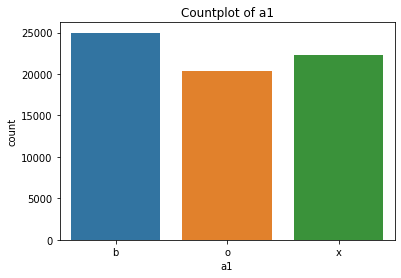

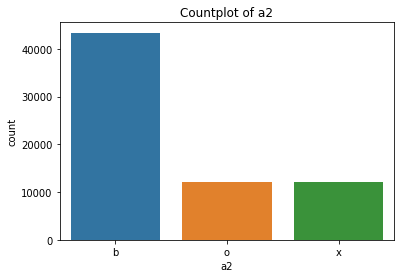

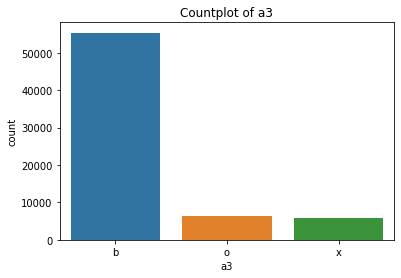

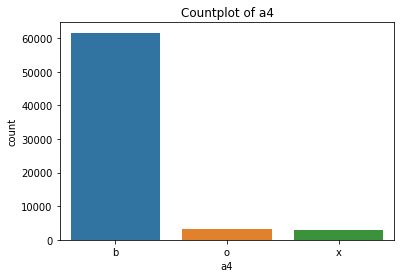

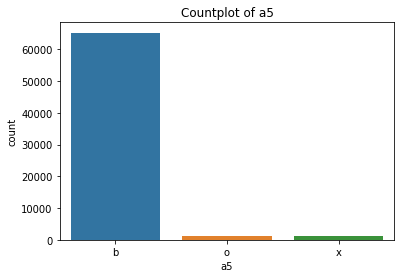

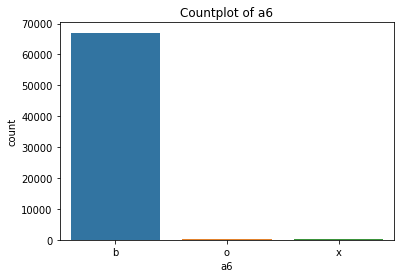

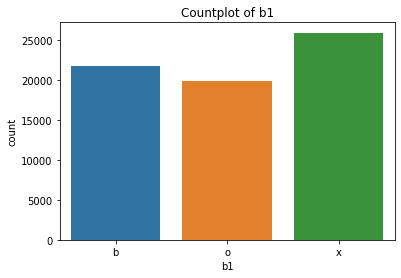

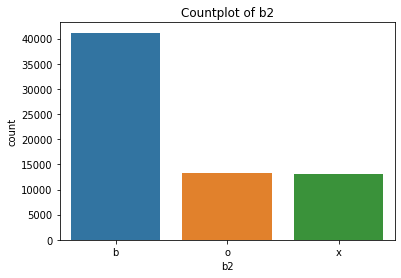

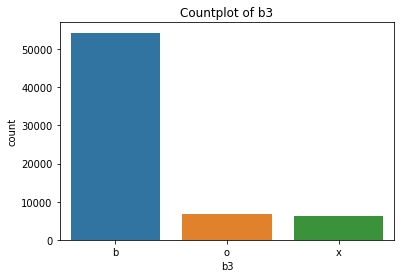

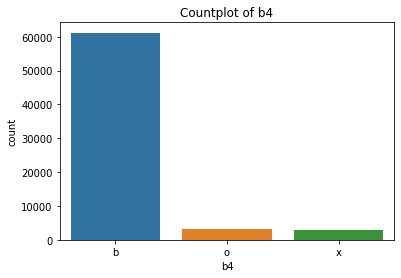

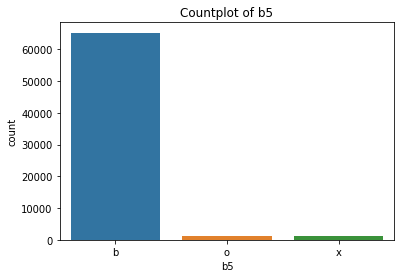

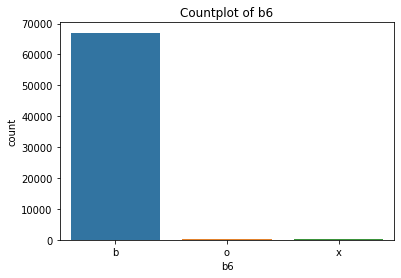

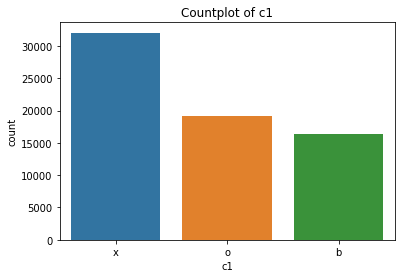

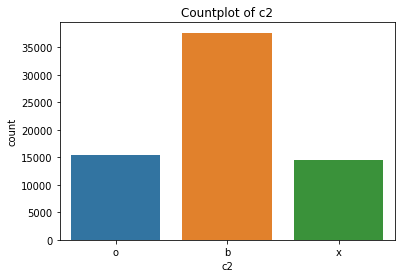

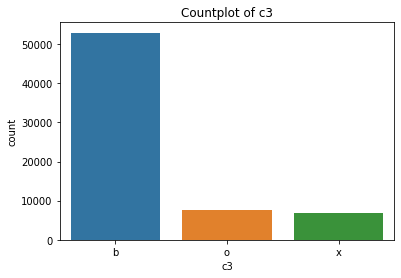

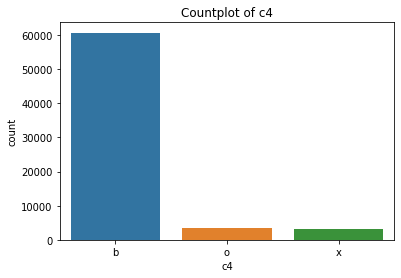

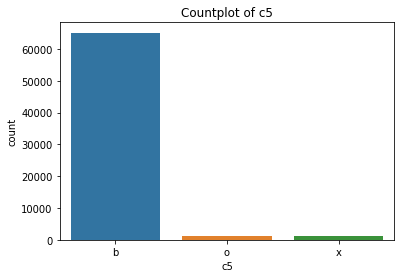

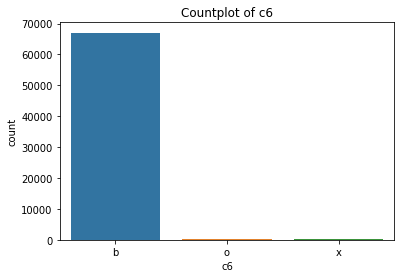

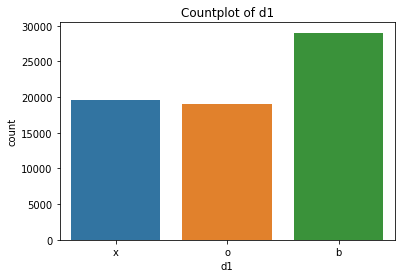

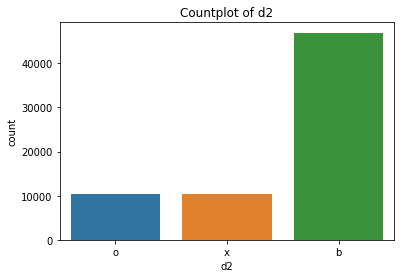

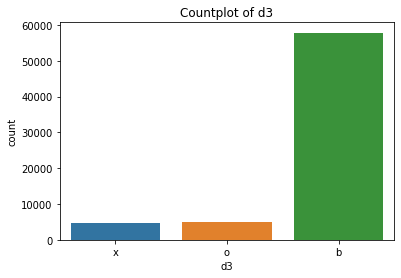

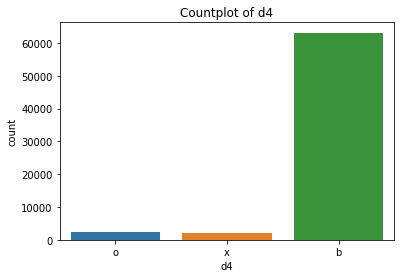

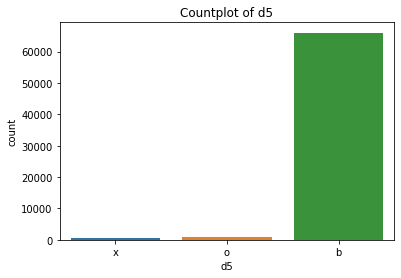

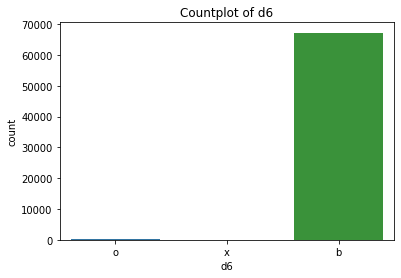

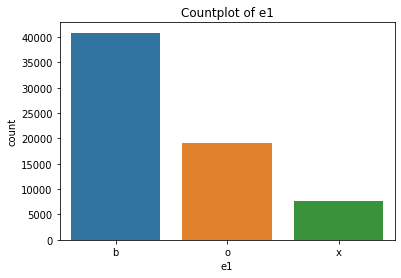

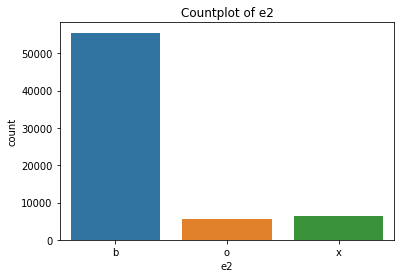

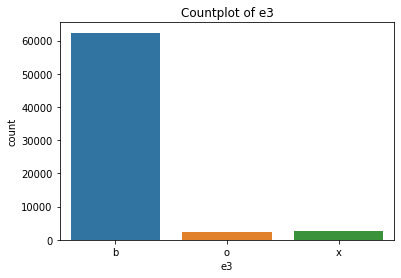

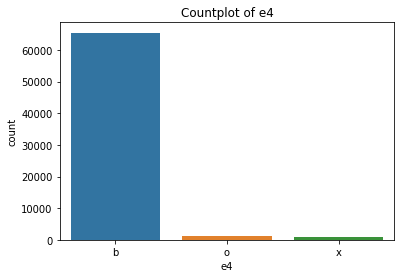

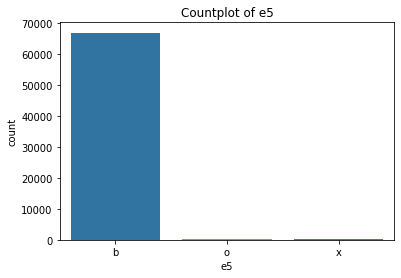

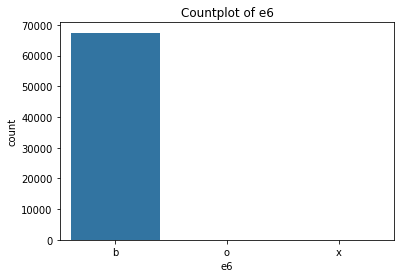

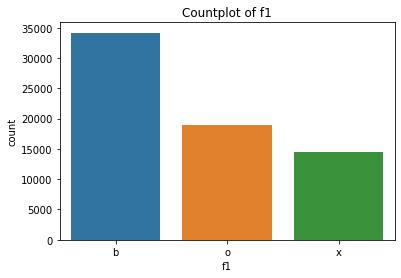

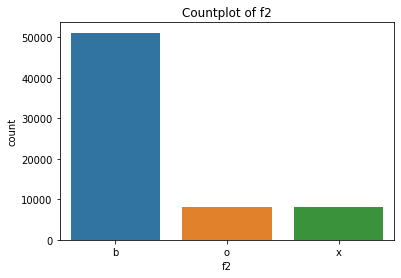

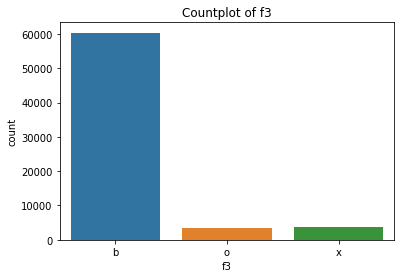

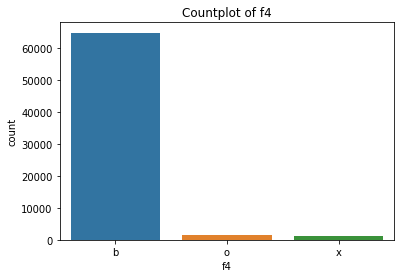

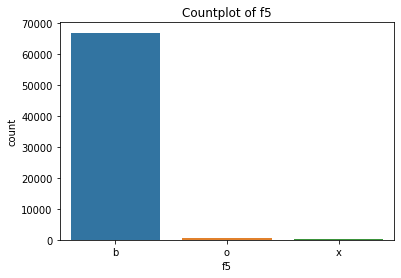

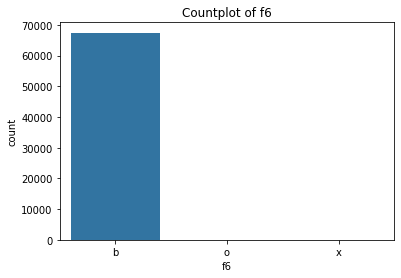

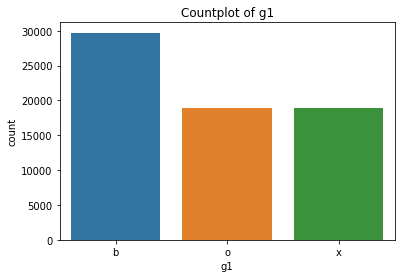

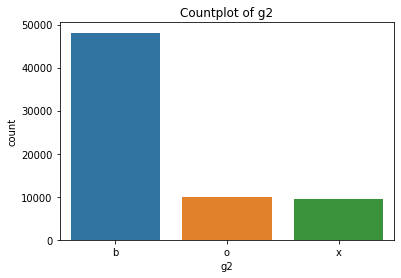

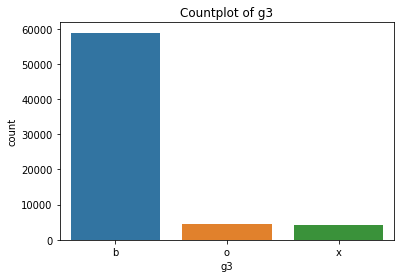

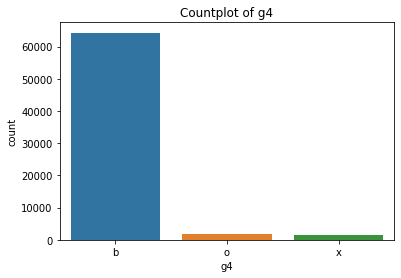

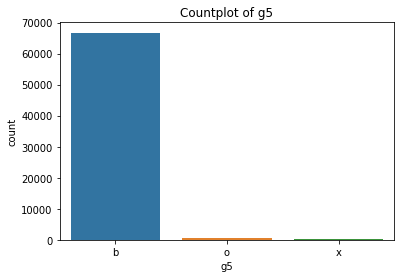

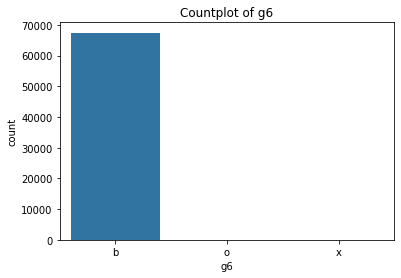

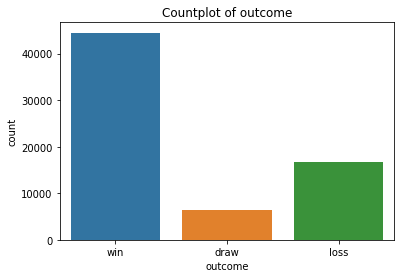

In [37]:
visualize_data("connect_4.csv")

### online_retail Data 

In [38]:
data_description("online_retail.csv")

This dataset contains 541909 entries, each with 8 attributes
InvoiceNo: nominal, discrete
StockCode: nominal, discrete
Description: nominal, discrete
Quantity: nominal, discrete
InvoiceDate: nominal, discrete
UnitPrice: ratio or interval, continuous
CustomerID: ratio or interval, continuous
Country: nominal, discrete


In [39]:
# It will take several minutes to run. So, I have commented it. 
# stats("online_retail.csv")

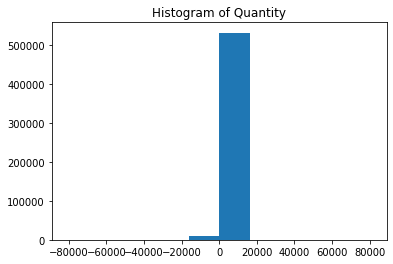

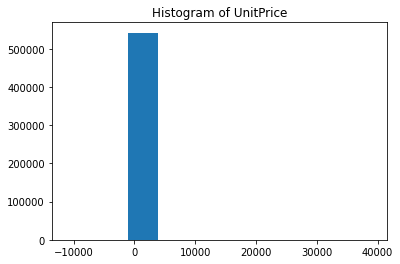

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


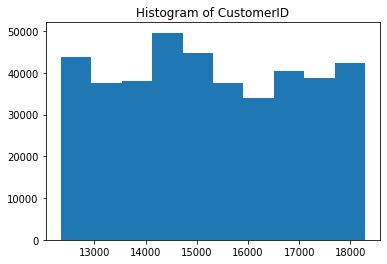

In [40]:
visualize_data("online_retail.csv")